<h1><center>Classification of Mushroom</center></h1>


This is a thorough analysis of the Mushroom Classification dataset presented by UCI Machine Learning about 
30 years ago. Recent years, Foraging specifically mushroom hunting is on the rise of popularity. With mushroom 
hunting, the most important aspects is knowing what's edible and what's poisonous because some mushrooms are 
deadly. With that in mind, I want to address my goal in two different aspects:
    1. From a data scientist's perspective:
        (i). What features are most indicative in terms of classifying edible and poisonous mushrooms.
    2. From a foraging beginner and enthusiast: 
        (i). What kind of mushrooms are safe to eat base on their characteristics.
I will first analyze the data using it's characteristics(color, shape, odor, etc.) and then I will classify them to achieve maximum precision and accuracy.



# About Mushroom Dataset 
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).

First column is a classifier
    1. Class: edible=e, poisonous=p
Rest of the variables:
    1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
    2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
    3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
    4. bruises: bruises=t, no=f
    5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
    6. gill-attachment: attached=a, descending=d, free=f, notched=n
    7. gill-spacing: close=c, crowded=w, distant=d
    8. gill-size: broad=b, narrow=n
    9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    10. stalk-shape: enlarging=e, tapering=t
    11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
    13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
    14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
    16. veil-type: partial=p, universal=u
    17. veil-color: brown=n, orange=o, white=w, yellow=y
    18. ring-number: none=n, one=o, two=t
    19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

 # Quick Look of Mushrooms
 
 The 4 data manipulations below give us a glimpse of the data set:
    - 8124 kinds of mushrooms.
    - 23 features for each mushroom.
    - None of the mushrooms contain a null value, so we don't need to worry about null values.
    - The data set is pretty balanced
    
    
The violin plot below represents the distribution of the classification characteristics. We can to see that "odor" and "gill-color" property of the mushroom breaks into two parts that may contribute to the classification.




In [4]:
# Get to know more about mushrooms
data.describe().transpose()

count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type                 8124      5   p  3968
spore-print-color         8124      9   w  2388
population                8124      6   v  4040
habitat                   8124      7   d  3148

In [5]:
data.isnull().sum() # checking each variable if it contains null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

e    4208
p    3916
Name: class, dtype: int64


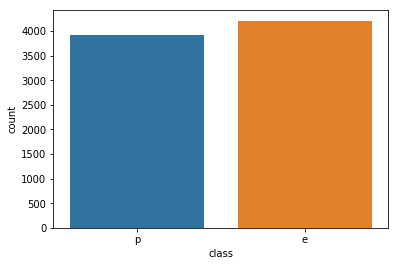

In [6]:
# plot the classifier to see if it's balanced
print(data['class'].value_counts())
sns.countplot(x='class', data=data)
plt.show()

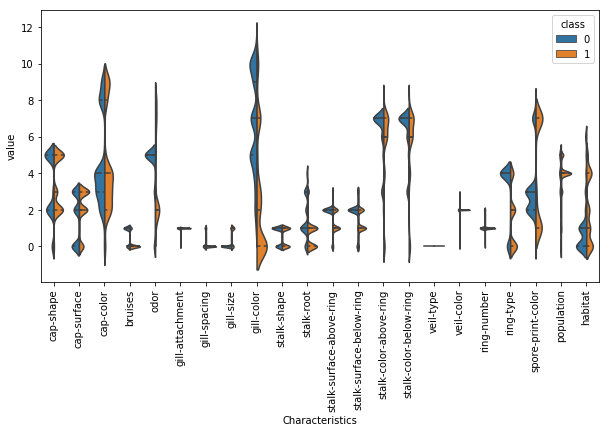

In [7]:
# Make a deep copy of the original data set, so when we convert the data from catagorical to ordinal, we have an original copy
transformed_data = data.copy(); 
labelenc=LabelEncoder()
for i in transformed_data.columns:
    transformed_data[i] = labelenc.fit_transform(transformed_data[i])
    
df_div = pd.melt(transformed_data, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile')
df_no_class = transformed_data.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));


# Important Features

How to identitfy a wild mushroom? There are some important characteristics we can look for: cap color, odor, , and gills.(The violin plot above suggest we need to especially look closely at the odor and gill color of the mushroom properties.


<h3>Cap Color</h3>


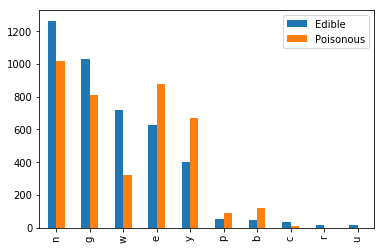

In [8]:
# Analysing Cap Color for Mushrooms:
edible_colors = data[data['class'] == 'e']['cap-color'].value_counts()
poisonous_color = data[data['class'] == 'p']['cap-color'].value_counts()
colors = pd.DataFrame([edible_colors, poisonous_color],index=['Edible','Poisonous'])
colors = colors.transpose()
colors.plot(kind= 'bar')

From the bar graph comparing each colors for edible and poisonous mushrooms, we can see that the top 5 colors for mushrooms are brown, grey, white, red and yellow. Out of these colors, brown, grey and white has more edible mushrooms than poisonous ones. On the other hand, poisonous mushrooms are more than edibles when the color is red or yellow. 

<h3>Odor</h3>

Odor is one of the main part in mushroom identification process. This dataset catagorized the odor into 9 types: 
    1. almond=a
    2. anise=l
    3. creosote=c
    4. fishy=y
    5. foul=f
    6. musty=m
    7. none=n
    8. pungent=p
    9. spicy=s
    

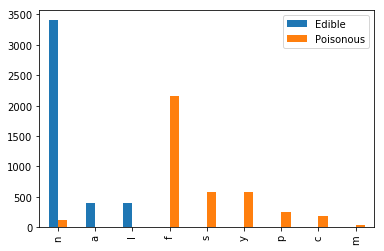

In [9]:
# Analysing Odor for Mushrooms:
edible_odor = data[data['class'] == 'e']['odor'].value_counts()
poisonous_odor = data[data['class'] == 'p']['odor'].value_counts()
odors = pd.DataFrame([edible_odor, poisonous_odor],index=['Edible','Poisonous'])
odors = odors.transpose()
odors.plot(kind= 'bar')

We can see from the graph, the odor of a mushroom is a very good indicator of whether it will be edible or poisonous. Edible mushroom mostly have no odor, but there are few that gives off an Almond-like or Anise-like smell. If a mushroom gives off any odor(especially a foul) other thank those two, it is very likely that they it is poisonous. 

<h3>Bruises</h3>

Another important feature to consider when identifying mushrooms is whether they bruise or bleed a specific color. Certain mushrooms will change colors when damaged or injured. Observing any color changes can be very important when trying to determine what it is. However, color change alone is one of the least reliable ways to go about mushroom identification, but we can use it just as another tool in our identification arsenal.

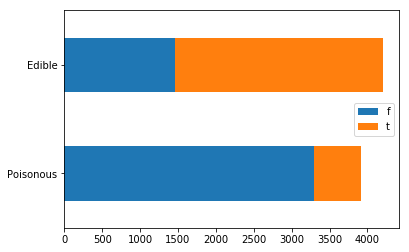

In [10]:
# Analyzing on the bruising condition of the mushroom:
bruised_poison = data[data['class']== 'p']['bruises'].value_counts()
bruised_edible = data[data['class']== 'e']['bruises'].value_counts()

bruises = pd.DataFrame([bruised_poison,bruised_edible],
                       index=['Poisonous','Edible'])
bruises.plot(kind = 'barh',stacked = True,)

We can see from the plot above:
edible mushrooms have more bruises while poisonous mushrooms deosn't bruise much

<h3>Gill Color</h3>

From the very begining, we did a violin plot which shows the color of the gill color breaks into two parts. This suggest that gill color might be a good indicator.


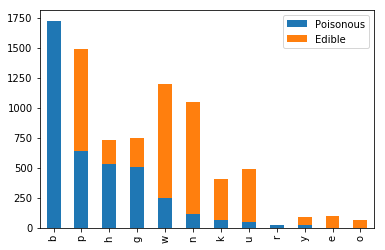

In [11]:
# Analyzing on the gill color of the mushroom:
poison_gillcolor = data[data['class']== 'p']['gill-color'].value_counts()
edible_gillcolor = data[data['class']== 'e']['gill-color'].value_counts()

gillcolors = pd.DataFrame([poison_gillcolor,edible_gillcolor],
                       index=['Poisonous','Edible'])
gillcolors = gillcolors.transpose()
gillcolors.plot(kind = 'bar',stacked = True,)

From the graph above, we can see that all the mushrooms wiwth buff colored gill are poisonnous. For the edible mushrooms, the graph suggests that most of them have white, brown or pink gill. However, if the gill is pink, there is also a high chance that it's poisonous. 

<h3>Gill Size</h3>

Last but not least we want to take a close look at the gill size of the mushrooms. Mushroom gills are the thin, papery structures that hang vertically under the cap. The sole purpose of these gills, called lamellae, is to produce spores. The spores are then dropped from the gills by the millions where they are scattered by wind currents. This little section we will analyze gill size specifically: whether the narrow or broad gill indicates the edibleness of a mushroom.

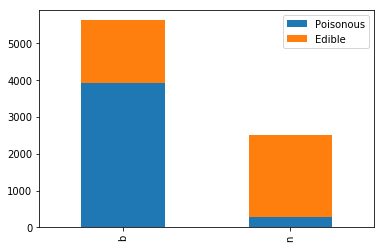

In [12]:
# Analyzing on the gill size of the mushroom(doing exactly what we did earlier for other characteristics):
poison_gillsize = data[data['class']== 'p']['gill-size'].value_counts()
edible_gillsize = data[data['class']== 'e']['gill-size'].value_counts()

gillsizes = pd.DataFrame([edible_gillsize,poison_gillsize],
                       index=['Poisonous','Edible'])
gillsizes = gillsizes.transpose()
gillsizes.plot(kind = 'bar',stacked = True,)

Clearly, most of the narrow gilled mushrooms are poisonous. There are a few mushrooms that has narrow gills and still edible, but I wouldn't risk it. On the other hand, it seems like most of the edible mushrooms have broad gills. However, the vice versa doesn't necessarily imply the same, because there is still a 30.15% chance that they are poisonous. 

# Best Fitting Model And Feature Importance

The analyzing we did above is just a simple analyzing of what we think is important and crucial in deciding the poisonous of mushrooms base on graphs of the characteristics we choose. To get a deeper understaning of the relationship of each feature to the classifier, we need to do a deeper analysis using different Machine Learning Models. Here I decided to do a Logistic Regression and Random Forest just because we learned about these two during class. Also because I need to have a good understanding of them in order to explain the results to people who doesn't know the technical side of it. Using these models will also help us have a better understand of what features are the important ones.


In order for us to feed the data into the machine learning algorithms, we need to first convert the categorical variables to ordinal varibles. Specifically we will use Label encoder such as 1,2,3...etc to replace text data. In the very begining, we ready did so for the violin plot, and we stored the converted dataset to the variable transformed_data

In [13]:
transformed_data.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color   ...     stalk-surface-below-ring  \
0             0          1           4   ...                            2   
1             0          0           4   ...                            2   
2             0          0           5   ...                            2   
3             0          1           5   ...                            2   
4             1          0           4   ...                            2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

First we want to see the correlation between class and features. We create a DataFrame that have all of features, then we use DataFrame.corr() to create our correlation table

In [14]:
Label = transformed_data['class']
Features = transformed_data.drop(['class'],axis=1)
Features.corr().head()

cap-shape  cap-surface  cap-color   bruises      odor  \
cap-shape     1.000000    -0.050454  -0.048203 -0.035374 -0.021935   
cap-surface  -0.050454     1.000000  -0.019402  0.070228  0.045233   
cap-color    -0.048203    -0.019402   1.000000 -0.000764 -0.387121   
bruises      -0.035374     0.070228  -0.000764  1.000000 -0.061825   
odor         -0.021935     0.045233  -0.387121 -0.061825  1.000000   

             gill-attachment  gill-spacing  gill-size  gill-color  \
cap-shape           0.078865      0.013196   0.054050   -0.006039   
cap-surface        -0.034180     -0.282306   0.208100   -0.161017   
cap-color           0.041436      0.144259  -0.169464    0.084659   
bruises             0.137359     -0.299473  -0.369596    0.527120   
odor               -0.059590      0.063936   0.310495   -0.129213   

             stalk-shape    ...     stalk-surface-below-ring  \
cap-shape       0.063794    ...                    -0.032591   
cap-surface    -0.014123    ...                     0.107965   
cap-color      -0.456496    ...                    -0.047710   
bruises         0.099364    ...                     0.458983   
odor            0.459766    ...                     0.061820   

             stalk-color-above-ring  stalk-color-below-ring  veil-type  \
cap-shape                 -0.031659               -0.030390        NaN   
cap-surface                0.066050                0.068885        NaN   
cap-color                  0.002364                0.008057        NaN   
bruises                    0.083538                0.092874        NaN   
odor                       0.174532                0.169407        NaN   

             veil-color  ring-number  ring-type  spore-print-color  \
cap-shape      0.072560    -0.106534  -0.025457          -0.073416   
cap-surface   -0.016603    -0.026147  -0.106407           0.230364   
cap-color      0.036130    -0.005822   0.162513          -0.293523   
bruises        0.119770     0.056788   0.692973          -0.285008   
odor          -0.057747     0.111905  -0.281387           0.469055   

             population   habitat  
cap-shape      0.063413 -0.042221  
cap-surface    0.021555  0.163887  
cap-color     -0.144770  0.033925  
bruises        0.088137 -0.075095  
odor          -0.043623 -0.026610  

[5 rows x 22 columns]

In the table, we can see the correlation of all the features. For better visualization of all the correlations, we will create a heatmap using seaborn.

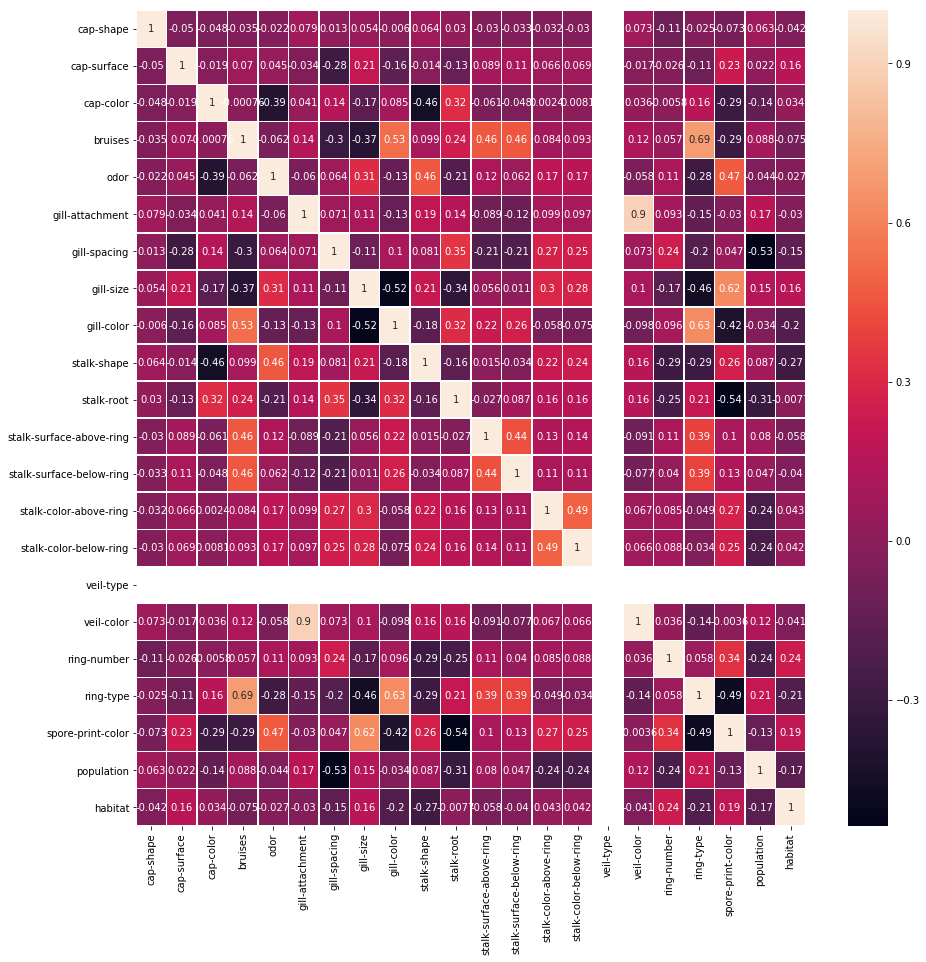

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(Features.corr(), annot=True, linewidths=.5,)

We can see from the heat map, the feature veil-type is not showing in the map, but everyting else is showing. The reason is that there is only one veil type in the dataset, so it doesn't contribute much to the classification to mushrooms. For furture reference, we can just drop this coloumn since it has no computtional use.

<h3>Predictions with LinearRegression</h3>

Finally, we are going to use all the features except veil type for the regression model for our future prediction.
We first create a data frame with all the features and then we are going to do a linear regression on the classifiers.

In [16]:
from sklearn import linear_model
X = Features
y = Label
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

We want to know how well deos our model fit this data set. So we are going to get they R-squared score to test how well the variance is explained by the model. Values range from 0 to 1, so the ~0.74 we returned means that 74% of the variance is explained by the model. This is not a bad score, but this means that this model is not the best fit for this data set. We can do a lot better using other prediction models.

In [17]:
lm.score(X,y)

0.74328412847225445

Using this model, we want to see what features are most indicative. In order to find that out, we can find the coeficients of each features. The bigger the coeficients, the more indicative the feature is.

In [18]:
dict = {}
coeficients = lm.coef_.tolist()
for features, coef in zip(X.columns, coeficients):
    dict[features] = coef
    print("Feature: {}, Coefficient: {}".format(features,coef))

Feature: cap-shape, Coefficient: -0.0017820070290093875
Feature: cap-surface, Coefficient: 0.023349210071249557
Feature: cap-color, Coefficient: -0.0013500204567827795
Feature: bruises, Coefficient: -0.34854322923066766
Feature: odor, Coefficient: -0.022486121772029122
Feature: gill-attachment, Coefficient: -0.06892355835491672
Feature: gill-spacing, Coefficient: -0.47414185235443307
Feature: gill-size, Coefficient: 0.5390861081911376
Feature: gill-color, Coefficient: -0.010068710835366508
Feature: stalk-shape, Coefficient: -0.05257538152439062
Feature: stalk-root, Coefficient: -0.07172193499958768
Feature: stalk-surface-above-ring, Coefficient: -0.1611880632182804
Feature: stalk-surface-below-ring, Coefficient: -0.057135225375938375
Feature: stalk-color-above-ring, Coefficient: -0.01098106018301419
Feature: stalk-color-below-ring, Coefficient: -0.006321726472646785
Feature: veil-type, Coefficient: -1.6653345369377348e-16
Feature: veil-color, Coefficient: 0.4007847830629997
Feature: ri

Let's get the top 5 features to see if they correspond to our early simple analyzing. Earlier we created a dictionary that has all the feature-coeficient pairs. Now we cna sort the dictionary according to its value and find out the top 5 features.

In [19]:
for w in sorted(dict, key=dict.get, reverse=True):
    print (w, dict[w])

gill-size 0.5390861081911376
veil-color 0.4007847830629997
ring-number 0.038662487853846364
cap-surface 0.023349210071249557
ring-type 0.017830171530780523
habitat 0.016822084620882475
veil-type -1.6653345369377348e-16
cap-color -0.0013500204567827795
cap-shape -0.0017820070290093875
stalk-color-below-ring -0.006321726472646785
population -0.009910442102293644
gill-color -0.010068710835366508
stalk-color-above-ring -0.01098106018301419
odor -0.022486121772029122
spore-print-color -0.048491105684018765
stalk-shape -0.05257538152439062
stalk-surface-below-ring -0.057135225375938375
gill-attachment -0.06892355835491672
stalk-root -0.07172193499958768
stalk-surface-above-ring -0.1611880632182804
bruises -0.34854322923066766
gill-spacing -0.47414185235443307


From our calculation above, we can see that our top 5 indicators are gill-size, veil-color, ring-number, cap-surface, ring-type. Some of the features are reasonable or same as what I thought it would be. What surprised me is that odor is not one of the strong indicator. Because our violin plot and histogram really shows how strong of an indicator it is for identify mushrooms. The only explaination I can tihkn of is that since this is not the best fitting model, we are leaving out some important information. 

<h3>Prediction using Random Forests</h3>

From the basic Linear Regression Model we used above, we couldn't get the most accurately prediction. In terms of identifying mushrooms, it is extremely important that our result is as accurate and precise as possible. So this section we will use a more sophiscated prediction model: Random Forests. To feed our data into the model, we will use most of our data as a training set, and the rest as a testing set. 


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state = 42)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
accuracy = cross_val_score(random_forest, X_train, Y_train, cv = 10, scoring='accuracy')
print("Accuracy: %f +-%f" % (accuracy.mean(), accuracy.std()));


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: 1.000000 +-0.000000


The accuracy we got for Random Forests is 100%! This means Random Forests is a way better(possibly the best) model for our dataset. Now we have a extremly accurate model, we want to find our top five most important features that will helping us identifying a mushroom. We use 10-Fold Cross Validation to make sure the model is not over fitting, now we need to find the best paramter using Grid Search


In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30, 50, 100], 'max_features': [2, 4, 6, 8]},
]

grid_search = GridSearchCV(random_forest, param_grid, cv=10, scoring='roc_auc') # use Area Under the Curve to calculate the scoring
grid_search.fit(X, y)
grid_search.best_params_ #found the best parameter

{'max_features': 2, 'n_estimators': 3}

In [23]:
importance = []
for name, score in zip(X_train.columns, grid_search.best_estimator_.feature_importances_):
    importance.append([name, score])
importance.sort(reverse=True, key= lambda x:x[1])
for char in importance:
    print(char)

['odor', 0.27079903274149819]
['spore-print-color', 0.15711590356672855]
['gill-color', 0.11712832539909585]
['population', 0.092620586305374744]
['gill-size', 0.070021490719239979]
['habitat', 0.059327983314368025]
['stalk-color-below-ring', 0.043442898788073843]
['stalk-root', 0.043282883212444577]
['stalk-surface-above-ring', 0.030064306909600682]
['stalk-shape', 0.026277764476246163]
['cap-surface', 0.019608925638188206]
['ring-type', 0.019347756263355938]
['stalk-color-above-ring', 0.011317769852151513]
['cap-shape', 0.010020146073347197]
['cap-color', 0.0091064066055498594]
['gill-spacing', 0.0065805076325819731]
['ring-number', 0.0060719099848129156]
['stalk-surface-below-ring', 0.0043195921563234357]
['bruises', 0.0035458103610183228]
['gill-attachment', 0.0]
['veil-type', 0.0]
['veil-color', 0.0]


We can see from this model, our top five indicators are: odor, spore-print-color, gill-color, population, gill-size. These features seems more reasonable to me too.

# Conclusion

In my analysis, I first choose some of the most prominently characteristics I think that will help me identifying mushrooms. Then I did some simple analysis on it(i.e comparing the ordor, gill-size, cap color, etc. of edible and poisonous mushrooms.) The resulting histograms did show some indication I choose. For example, the bar graph for odor showed that if a mushroom gives off a foul smell, it must be poisonous, so stay away! On the other hand, if the mushroom doesn't smell bad, then it has a really high chance that the mushroom is edible. 

To confirm my simple analysis, I tested two prediction models: Linear Regression and Random Forests. Linear Regression had only a 77% accuracy, while the Random Forests had 100% accurancy. We can conclude that Random Forests is the best prediction model for this dataset. Using Random Forests, I further confirmed that odor and gill-size are two of the most indicative features, while the other features I thought was helpful in terms of identifying mushrooms turned out to be not so helpful.

Further studies for identifying poisonous mushrooms can be find here:
https://towardsdatascience.com/deep-learning-and-poisonous-mushrooms-4377ea4c9b80 This guys did Deep Learning on classifying mushrooms. He used TensorFlow which allow him to classify mushrooms using images. His prediction whether a mushroom is poisonous is as high as %99. With the growing industry in AL and ML, we are not only able to identify poisonous mushrooms, there are ton of resources out there that can predict flower, food, faces, hapiness..etc. Just anything we can know of that has a large amount of datasets available for us to use to train the models. 

Finally, rule of thumb? When you go foraging next time. If you find some good looking wild mushrooms. Don't eat it if it has a foul smell and broad gills. The chance that it is a poinsonous mushroom is extremely high. You might die if you eat it.